In [21]:
import os
import sys
import cv2
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

TUMOR_CLASSES = ["category1_tumor", "category2_tumor", "category3_tumor", "no_tumor"]
IMG_WIDTH = 80
IMG_HEIGHT = 80
BASE_PATH = "../Datathon-Dataset"
MODEL_FILENAME = "tumor8.h5"

### Load Data

In [22]:
def load_data_for_testing(base_path):
    images = []
    labels = []

    for i, tumor_class in enumerate(TUMOR_CLASSES):
        class_path = os.path.join(base_path, tumor_class)

        for filename in os.listdir(class_path):
            if filename.endswith(".jpg"):
                img = cv2.imread(os.path.join(class_path, filename))
                img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
                images.append(img)
                labels.append(i)
    return images, labels

In [23]:
test_images, test_labels = load_data_for_testing(BASE_PATH)

### Load Model

In [24]:
if not os.path.exists(MODEL_FILENAME):
    print(f"Model file '{MODEL_FILENAME}' not found.")
    sys.exit(1)


model = tf.keras.models.load_model(MODEL_FILENAME)

### Run Model

In [25]:
# Preprocess test data
test_images = np.array(test_images)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Evaluate model performance
loss, accuracy = model.evaluate(test_images, test_labels, verbose=2)

predictions = model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)
y_test = np.argmax(test_labels, axis=1)

101/101 - 8s - loss: 141.0023 - accuracy: 0.6998 - 8s/epoch - 74ms/step
101/101 [==============================] - 8s 69ms/step


### Evaluate model


Loss: 141.00230407714844
Accuracy:  0.6997518610421837
Recall:  0.6997518610421837
Precision:  0.7716071527914862
F1 Score:  0.6955401634554107


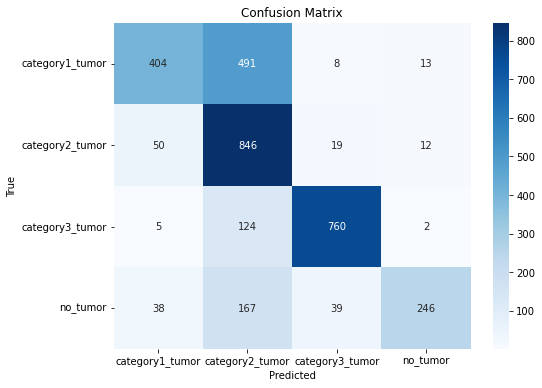

In [26]:
print(f"\nLoss: {loss}")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted'))


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=TUMOR_CLASSES, yticklabels=TUMOR_CLASSES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
